<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

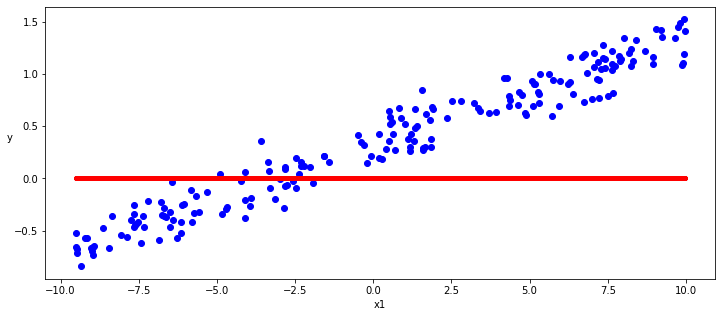

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionPyTorch, self).__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])

    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.13607987761497498
Step 40, Loss 0.10550859570503235
Step 60, Loss 0.0978144183754921
Step 80, Loss 0.09178649634122849
Step 100, Loss 0.08627558499574661
Step 120, Loss 0.08118858188390732
Step 140, Loss 0.07649026066064835
Step 160, Loss 0.07215078175067902
Step 180, Loss 0.06814274936914444
Step 200, Loss 0.06444083899259567
Step 220, Loss 0.06102168187499046
Step 240, Loss 0.057863663882017136
Step 260, Loss 0.05494684725999832
Step 280, Loss 0.05225280299782753
Step 300, Loss 0.04976453632116318
Step 320, Loss 0.04746631532907486
Step 340, Loss 0.04534361883997917
Step 360, Loss 0.04338305443525314
Step 380, Loss 0.04157222807407379
Step 400, Loss 0.03989970311522484
Step 420, Loss 0.03835493326187134
Step 440, Loss 0.036928147077560425
Step 460, Loss 0.03561033681035042
Step 480, Loss 0.03439316898584366


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.6209157705307007
Epoch 20 : Loss 0.16410431265830994
Epoch 40 : Loss 0.13149896264076233
Epoch 60 : Loss 0.12182530760765076
Epoch 80 : Loss 0.11396379768848419
Epoch 100 : Loss 0.10675906389951706
Epoch 120 : Loss 0.1001075804233551
Epoch 140 : Loss 0.09396424144506454
Epoch 160 : Loss 0.08829017728567123
Epoch 180 : Loss 0.0830494612455368
Epoch 200 : Loss 0.0782090276479721
Epoch 220 : Loss 0.07373827695846558
Epoch 240 : Loss 0.06960900872945786
Epoch 260 : Loss 0.06579509377479553
Epoch 280 : Loss 0.06227250024676323
Epoch 300 : Loss 0.059018947184085846
Epoch 320 : Loss 0.05601389333605766
Epoch 340 : Loss 0.05323835462331772
Epoch 360 : Loss 0.050674811005592346
Epoch 380 : Loss 0.04830705001950264
Epoch 400 : Loss 0.04612013325095177
Epoch 420 : Loss 0.04410027340054512
Epoch 440 : Loss 0.04223468154668808
Epoch 460 : Loss 0.040511563420295715
Epoch 480 : Loss 0.03892005234956741


# Data Visualization

In [13]:
tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(0.1043277, 0.19993056, 0.10458081215620041, 0.18313688039779663)

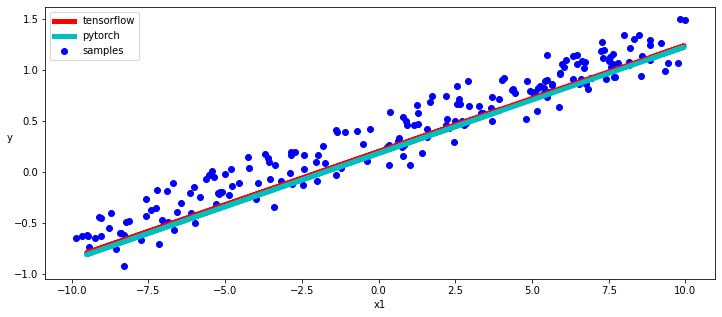

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)